#  8 多项式回归

## 8.1 概述

### 8.1.1 线性回归解决多项式问题

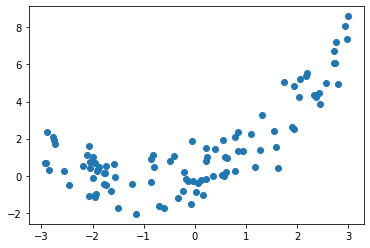

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x**2 + x + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

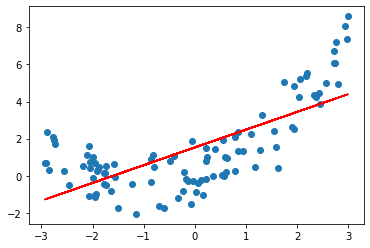

In [3]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

### 8.1.2 解决方案，添加一个特征

In [4]:
(X**2).shape

(100, 1)

In [5]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

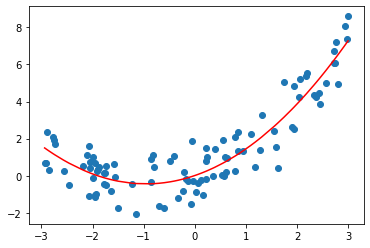

In [6]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

plt.scatter(x, y)
# 排序后画图
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [7]:
lin_reg2.coef_

array([0.94516913, 0.49415306])

## 8.2 scikit-learn中的多项式回归和Pipeline
### 8.2.1 案例

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x**2 + x + np.random.normal(0, 1, size=100)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [10]:
X2[:5, :]

array([[ 1.        , -1.35750491,  1.84281959],
       [ 1.        ,  2.34167495,  5.48344159],
       [ 1.        ,  0.33362413,  0.11130506],
       [ 1.        ,  1.76912201,  3.1297927 ],
       [ 1.        ,  2.39947988,  5.75750368]])

In [11]:
X[:5,:]

array([[-1.35750491],
       [ 2.34167495],
       [ 0.33362413],
       [ 1.76912201],
       [ 2.39947988]])

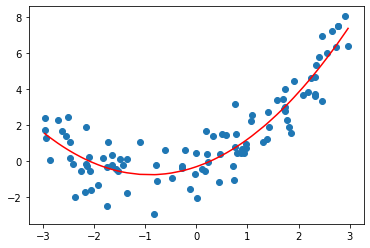

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

plt.scatter(x, y)
# 排序后画图
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [13]:
lin_reg2.coef_

array([0.        , 0.98345361, 0.54272178])

In [14]:
lin_reg2.intercept_

-0.3104364876004122

### 8.2.2 关于PolynomialFeatures

PolynomialFeatures(degree=3)

x1,x2
* 1,x1,x2
* 2,$x_1^2, x_2^2, x_1 * x_2$
* 3,$x_1^3, x_2^3, x_1^2 * x_2, x_1 * x_2^2$

In [15]:
X = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [16]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [17]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [18]:
X2.shape

(5, 6)

In [19]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### 8.2.3 Pipeline

In [20]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x**2 + x + np.random.normal(0, 1, size=100)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ploy_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
    
ploy_reg.fit(X, y)
y_predict = ploy_reg.predict(X)

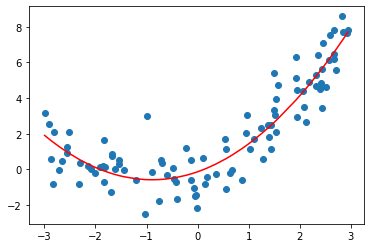

In [22]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

## 8.3 过拟合和欠拟合

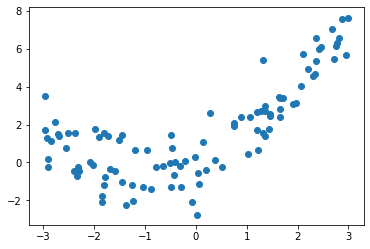

In [23]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x**2 + x + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

### 8.3.1 使用线性回归

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865008

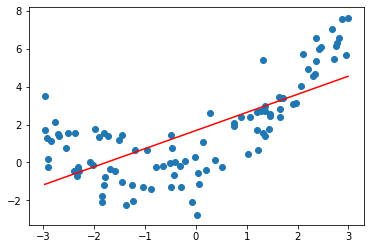

In [25]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 8.3.2 使用多项式回归

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [28]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

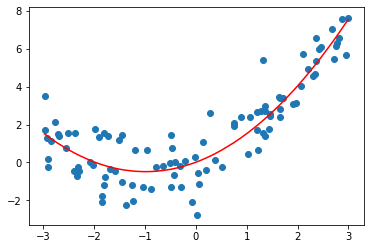

In [29]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [30]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764144

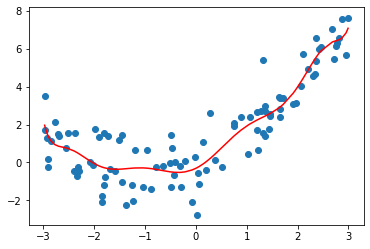

In [31]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [32]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6874077893920001

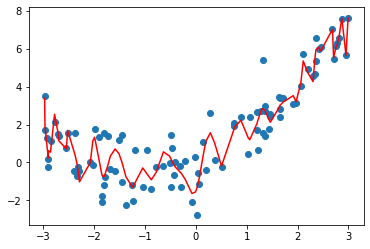

In [33]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [34]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

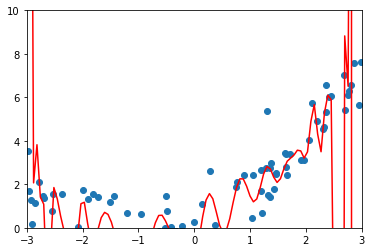

In [35]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### 8.3.3 train test split的意义

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396578

In [37]:
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297902

In [38]:
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150803

In [39]:
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075796350.749704

## 8.4 为什么要有训练数据集与测试数据集
针对上一节的例子
### 8.4.1 概述
#### 模型的泛化能力
泛化能力（generalization ability）是指机器学习算法对新鲜样本的适应能力。学习的目的是学到隐含在数据背后的规律，对具有同一规律的学习集以外的数据，经过训练的网络也能给出合适的输出，该能力称为泛化能力。
#### 测试数据集的意义
寻找泛化能力最好的地方
![](../image/pr1-1.png)
#### 欠拟合和过拟合
* 欠拟合 underfiting：算法所训练的模型不能完整表述数据关系
* 过拟合 overfiting：算法所训练的模型过多地表达了数据间的噪音关系

## 8.5 学习曲线
![](../image/pr1-2.png)
### 8.5.1 概述
随着训练样本的逐步增多，算法训练出的模型的表现能力
![](../image/pr1-3.png)
![](../image/pr1-4.png)

### 8.5.2 学习曲线

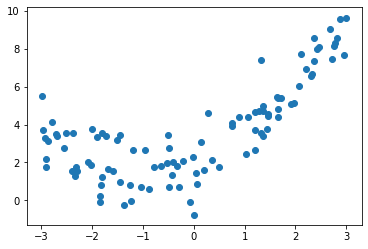

In [40]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape

(75, 1)

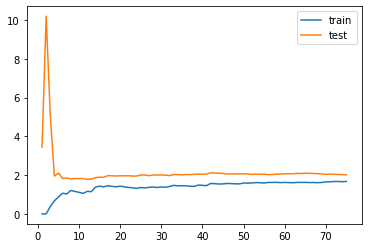

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

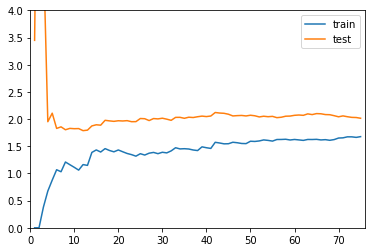

In [43]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

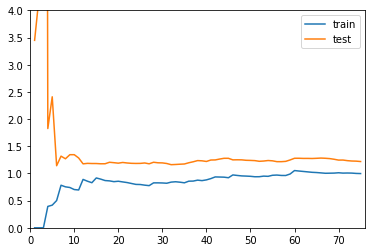

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

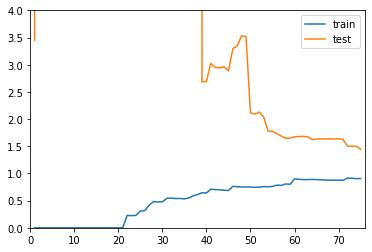

In [45]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

## 8.6 验证数据集与交叉验证

### 8.6.1 概述
#### 训练+测试数据即的问题
![](../image/pr1-5.png)

#### 交叉验证Cross Validation
![](../image/pr1-6.png)

### 8.6.2 案例验证
#### Validation和Cross Validation

In [46]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

#### 测试train_test_split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

from sklearn.neighbors import KNeighborsClassifier

best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 3
Best P = 4
Best Score = 0.9860917941585535


#### 使用交叉验证

In [48]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

array([0.99537037, 0.98148148, 0.97685185, 0.97674419, 0.97209302])

In [49]:
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 2
Best P = 2
Best Score = 0.9851507321274763


In [50]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

#### 回顾网格搜索

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(2, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   25.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=5,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [52]:
grid_search.best_score_

0.9851507321274763

In [53]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [54]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.980528511821975

#### cv参数

In [55]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.99537037, 0.96759259, 0.98611111, 0.95813953, 0.97674419])

In [56]:
grid_search = GridSearchCV(knn_clf, param_grid, verbose=1, cv=5)

### 8.6.3 k-folds交叉验证
#### 把训练数据集分成k份，成为k-folds cross validation
缺点：每次训练k个模型，相当于整体性能满了k倍

#### 留一法 LOO-CV
* 把训练数据集分成m份，成为留一法 Leave-One-Out Cross Validation
完全不受随机的影响，最接近模型真正的性能指标

* 缺点：计算量巨大

## 8.7 偏差方差权衡（Bias Variance Trade off）
### 8.7.1 概述
#### 偏差和方差
![](../image/pr1-7.png)

#### 模型误差
* 模型误差 = 偏差（Bias） + 方差（Variance） + 不可避免的误差

##### 偏差
* 导致偏差的主要原因：对问题本身的假设不正确！
如：非线性数据使用线性回归，欠拟合 underfitting

##### 方差
* 数据的一点点扰动都会较大地影响模型。
* 通常原因，使用的模型太复杂。如高阶多项式回归。
* 过拟合 overfitting

#### 偏差和方差总结
* 有一些算法天生是高方差的算法。如kNN。
* 非参数学习通常都是高方差算法。因为不对数据进行任何假设
* 有一些算法天生就是高偏差算法。如线性回归
* 参数学习通常都是高偏差算法。因为对数据具有极强的假设
* 大多数算法具有相应的参数，可以调整偏差和方差。如kNN中的k，线性回归中使用多项式回归

##### 偏差和方差的关系
* 偏差和方差通常是矛盾的
* 降低偏差，会提高方差
* 降低方差，会提高偏差

##### 方差
机器学习的主要挑战，来自于方差！

* 解决高方差的通常手段
    * 1 降低模型复杂度
    * 2 减少数据维度；降噪
    * 3 增加样本数
    * 4 使用验证集
    * 5 模型正则化

## 8.8 模型泛化与岭回归
### 8.8.1 概述
#### 模型正则化 Regularization
##### 模型正则化：限制参数的大小
* 目标：使 $ \sum_{i=1}^{m}(y^{(i)} - \theta_0 - \theta_1X_1^{(i)} - \theta_2X_2^{(i)} - \cdots  - \theta_nX_n^{(i)})^2 $ 尽可能小
* 目标：使 $ J(\theta) = MSE(y, \hat{y}; \theta) $尽可能小

加入模型正则化，模板：使 $ J(\theta) = MSE(y, \hat{y}; \theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$ 尽可能小

#### 岭回归 Ridge Regression
* 目标：使 $ J(\theta) = MSE(y, \hat{y}; \theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$ 尽可能小

LASSO趋向于使得一部分theta值变为0.所以可作为特征选择用。

#### LASSO Regression
Least Absolute Shinkage and Selection Operator Regression
* 目标：使 $ J(\theta) = MSE(y, \hat{y}; \theta) + \alpha\sum_{i=1}^{n} |\theta_i|$ 尽可能小


#### 比较Ridge和LASSO
![](../image/pr1-8.png)

### 8.8.2 实例

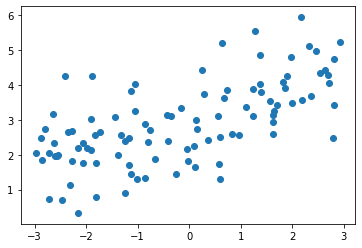

In [57]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [59]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [60]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.94010867772357

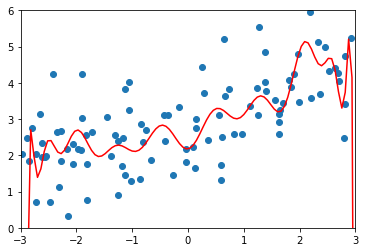

In [61]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

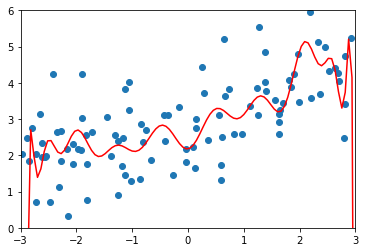

In [62]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

#### 使用岭回归

In [63]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [64]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754136291

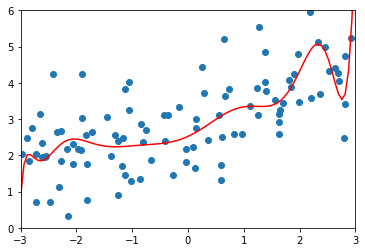

In [65]:
plot_model(ridge1_reg)

In [66]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218461

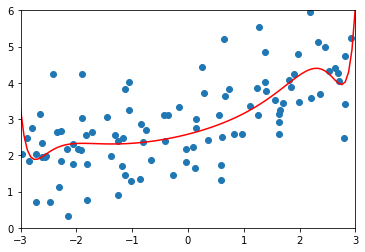

In [67]:
plot_model(ridge2_reg)

In [68]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

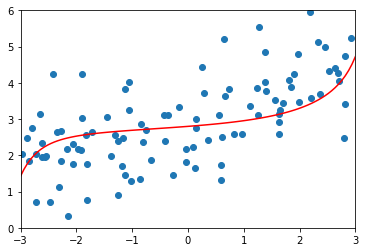

In [69]:
plot_model(ridge3_reg)

In [70]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408455590998372

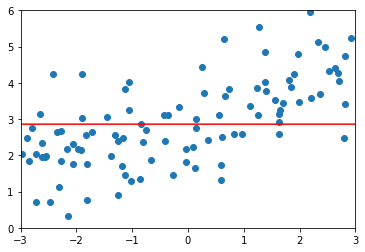

In [71]:
plot_model(ridge4_reg)

#### LASSO

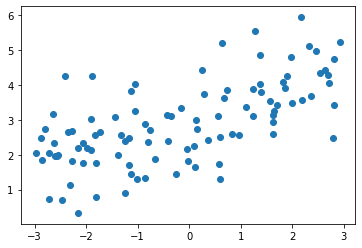

In [72]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

167.94010867772357

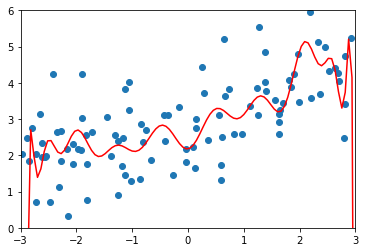

In [74]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

In [75]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [76]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259966

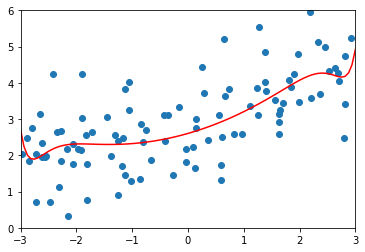

In [77]:
plot_model(lasso1_reg)

In [78]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

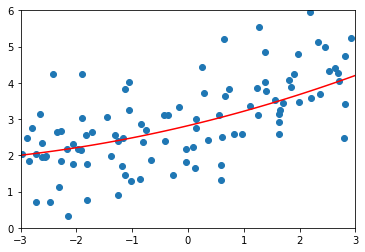

In [79]:
plot_model(lasso2_reg)

In [80]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

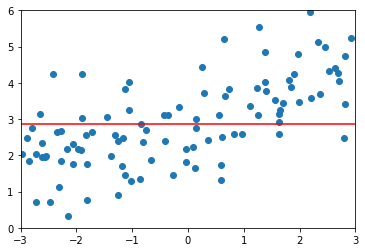

In [81]:
plot_model(lasso3_reg)

## 8.9 L1，L2的弹性网络

### 8.9.1 比较Ridge和LASSO

![](../image/pr1-9.png)

#### 明可夫斯基距离 Minkowski Distance
$$ (\sum_1^n|X_i^{(a)} - X_i^{(b)}|^p)^{\frac{1}{p}} $$


#### LP函数

$$ ||X||_p =(\sum_1^n|X_i|^p)^{\frac{1}{p}} $$

* Ridge    $  \sum_1^n\theta_i^2 $   L2正则项
* LASSO    $  \sum_1^n|\theta_i| $   L1正则项
* Ln正则项

#### L0正则项

目标：使 $ J(\theta) = MSE(y, \hat{y}; \theta) +  min\{number-of-non-zero - \theta\}$ 尽可能小

实际用L1取代，因为L0正则的优化是一个NP难的问题

#### 弹性网

$ J(\theta) = MSE(y, \hat{y}; \theta) +  r\alpha\sum_{i=1}^{n} |\theta_i|  + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2 $